In [37]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("Resources/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [39]:
print(df.shape)

(114000, 21)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [41]:
# We have a single  null value for artists,album_name and track_name
#We have category/strings for columns

In [42]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# We would need to scale up looking at the max values of the columns

In [43]:
# Drop unwanted columns
cols_to_drop = ["Unnamed: 0", "track_id","artists" ,"album_name","track_name","track_genre"]
df = df.drop(columns=cols_to_drop)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [44]:
# finding the max and min of popularity so that we can see how to bin it.
print(df['popularity'].min())  
print(df['popularity'].max())

0
100


In [45]:
# We will first define the bins and labels
bins = [0, 33, 66, 100]
labels = ['Low', 'Medium', 'High']

# Then we Apply the  binning to the popularity column
df['popularity'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=True, include_lowest=True)



In [46]:
print(df['popularity'].unique())

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [47]:
# numeric columns,category columns and meta column
num_cols = ["duration_ms","danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

cat_cols = ['key', 'mode','time_signature']
meta = ['explicit']


In [48]:
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


In [49]:
# One-hot encode the categorical columns
df_cat = pd.get_dummies(df[cat_cols], drop_first=True)

# Combining scaled numerical data with categorical data
df_final = pd.concat([df_scaled, df_cat], axis=1)


df_final.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
0,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4
1,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4
2,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4
3,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3
4,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4


In [50]:
# Include popularity in the final dataset
df_final['popularity'] = df['popularity']

# Check the final dataset
df_final.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,popularity
0,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,High
1,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,Medium
2,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,Medium
3,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,High
4,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,High


In [51]:
# Initializing the label encoder
le = LabelEncoder()

# Encode the popularity column
df_final['popularity'] = le.fit_transform(df_final['popularity'])

# Check the final dataset
df_final.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,popularity
0,0.024575,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,0
1,-0.730859,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,2
2,-0.160332,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,2
3,-0.243214,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,0
4,-0.271919,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,0


In [52]:
# correlation analysis
corrs = df_final.corr()
corrs

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,popularity
duration_ms,1.000000,-0.073426,0.058523,-0.003470,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.008114,-0.035556,0.018225,0.019467
danceability,-0.073426,1.000000,0.134325,0.259077,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.036469,-0.069219,0.207218,-0.008379
energy,0.058523,0.134325,1.000000,0.761690,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.048006,-0.078362,0.187126,-0.035871
loudness,-0.003470,0.259077,0.761690,1.000000,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.038590,-0.041764,0.191992,-0.023326
speechiness,-0.062600,0.108626,0.142509,0.060826,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,0.020418,-0.046532,-0.000011,-0.055831
acousticness,-0.103788,-0.171533,-0.733906,-0.589803,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.040937,0.095553,-0.176138,0.040788
instrumentalness,0.124371,-0.185606,-0.181879,-0.433477,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.006823,-0.049955,-0.082580,-0.003080
liveness,0.010321,-0.131617,0.184796,0.076899,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600,-0.001600,0.014012,-0.023651,0.043865
valence,-0.154479,0.477341,0.258934,0.279848,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273,0.034103,0.021953,0.133686,-0.051405
tempo,0.024346,-0.050450,0.247851,0.212446,0.017273,-0.208224,-0.050330,0.000600,0.078273,1.000000,0.010917,0.000566,0.066641,0.019983


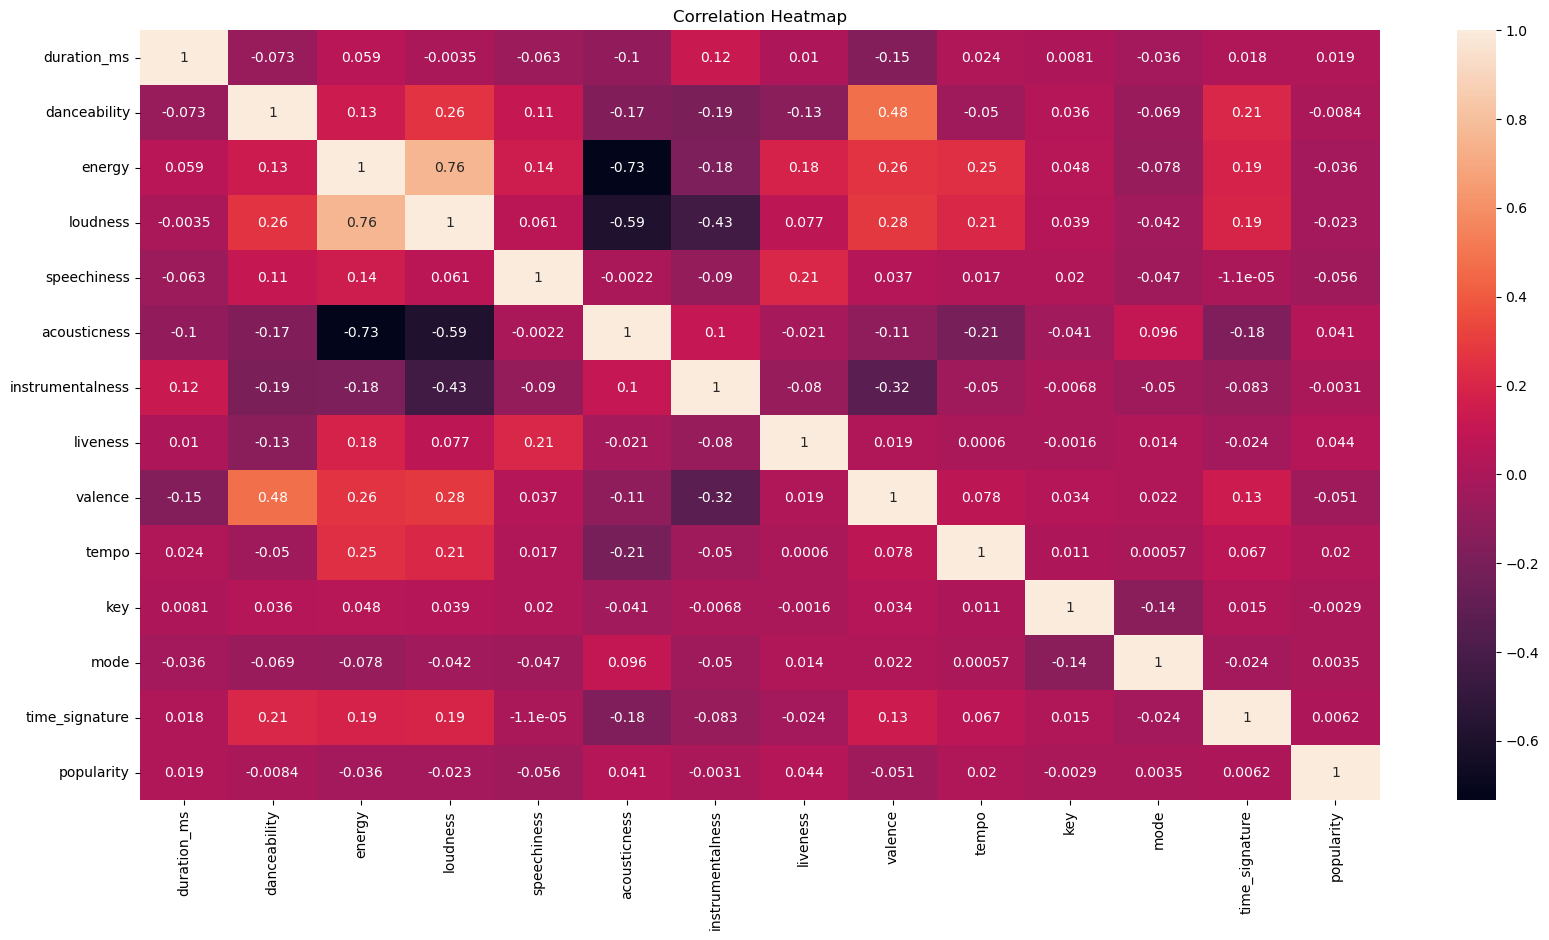

In [53]:
# Plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
# Step 1: Get the Data
X = df_final.drop(columns=["popularity"])
y = df_final.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,) 
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(114000, 13)
(85500, 13)
(28500, 13)


In [55]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # For multi-class, we need to binarize the labels for ROC AUC
    y_train_bin = label_binarize(y_train, classes=model.classes_)
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    
    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    
    # Multi-class AUC - compute AUC for each class
    train_auc = roc_auc_score(y_train_bin, model.predict_proba(X_train), multi_class="ovr")
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)
    
    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    
    # Multi-class AUC - compute AUC for each class
    test_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test), multi_class="ovr")
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=model.classes_, 
                yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    # Plot ROC curve for each class in a multi-class problem
    plt.figure(figsize=(6, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i]):.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()


TRAIN METRICS
    Confusion Matrix: 
    [[    0  2701  3074]
 [    0 26816 14857]
 [    0 19432 18620]]
    
    AUC: 0.6260803211423812

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      5775
           1       0.55      0.64      0.59     41673
           2       0.51      0.49      0.50     38052

    accuracy                           0.53     85500
   macro avg       0.35      0.38      0.36     85500
weighted avg       0.49      0.53      0.51     85500

    
TEST METRICS
    Confusion Matrix: 
    [[   0  890  967]
 [   0 8857 5052]
 [   0 6390 6344]]
    
    AUC: 0.6240741517003864

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      1857
           1       0.55      0.64      0.59     13909
           2       0.51      0.50      0.51     12734

    accuracy                           0.53     28500
   macro avg

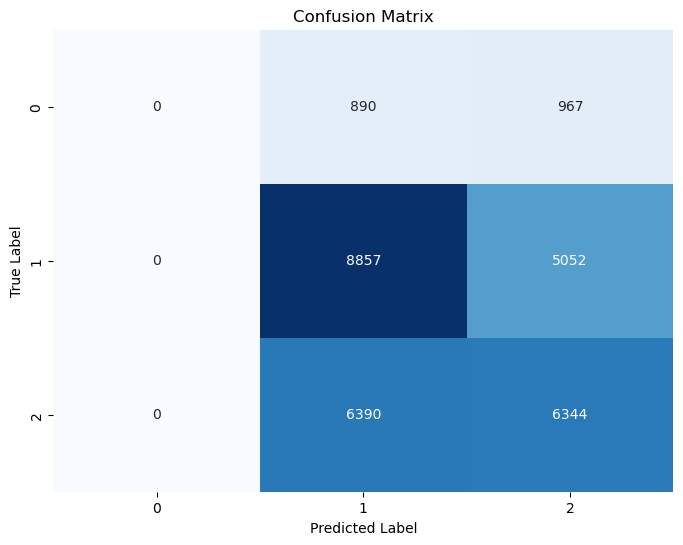

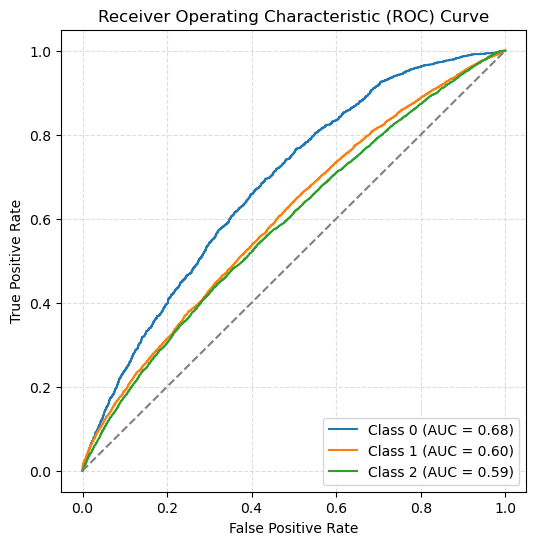

In [56]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[ 5474   226    75]
 [   39 41510   124]
 [   69   183 37800]]
    
    AUC: 0.9990385057620323

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      0.95      0.96      5775
           1       0.99      1.00      0.99     41673
           2       0.99      0.99      0.99     38052

    accuracy                           0.99     85500
   macro avg       0.99      0.98      0.98     85500
weighted avg       0.99      0.99      0.99     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 1048   295   514]
 [   64 10545  3300]
 [   69  2646 10019]]
    
    AUC: 0.8786428160391985

    Classification Report:
                  precision    recall  f1-score   support

           0       0.89      0.56      0.69      1857
           1       0.78      0.76      0.77     13909
           2       0.72      0.79      0.75     12734

    accuracy                           0.76     28500
   

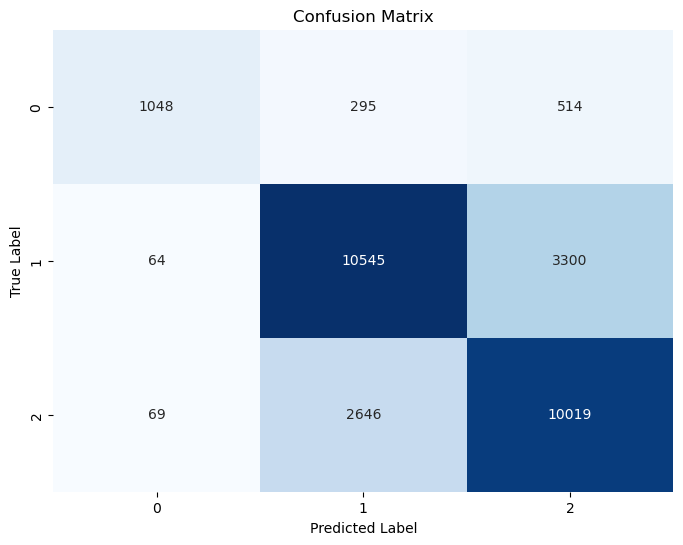

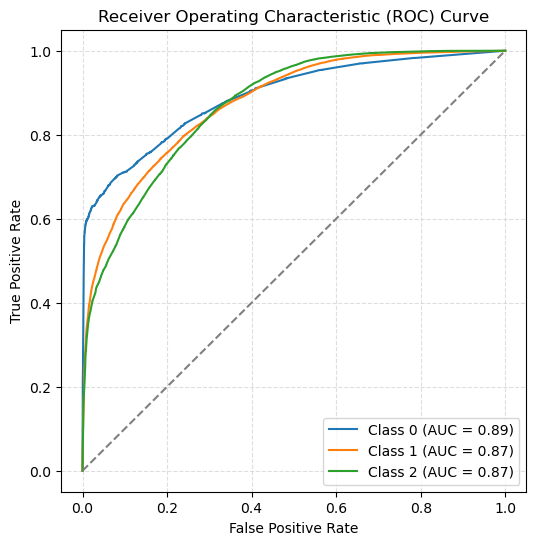

In [57]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[    4  2658  3113]
 [    0 28627 13046]
 [    0 15269 22783]]
    
    AUC: 0.7168734947424337

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.00      0.00      5775
           1       0.61      0.69      0.65     41673
           2       0.59      0.60      0.59     38052

    accuracy                           0.60     85500
   macro avg       0.73      0.43      0.41     85500
weighted avg       0.63      0.60      0.58     85500

    
TEST METRICS
    Confusion Matrix: 
    [[   1  852 1004]
 [   0 9439 4470]
 [   1 5184 7549]]
    
    AUC: 0.6986804197254418

    Classification Report:
                  precision    recall  f1-score   support

           0       0.50      0.00      0.00      1857
           1       0.61      0.68      0.64     13909
           2       0.58      0.59      0.59     12734

    accuracy                           0.60     28500
   macro avg

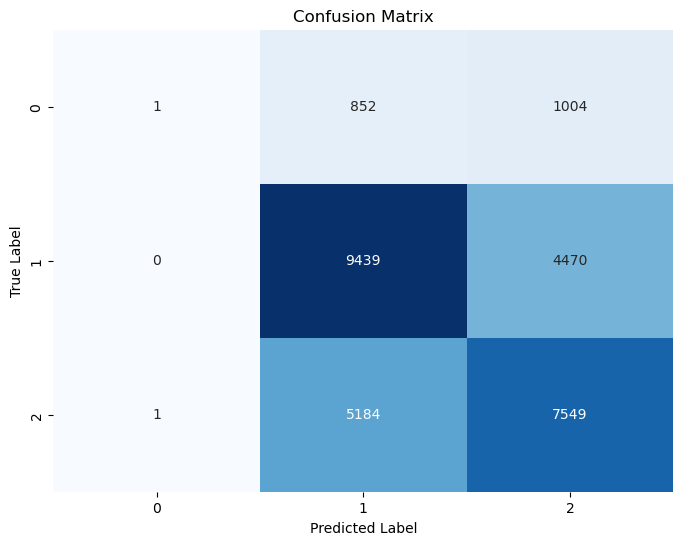

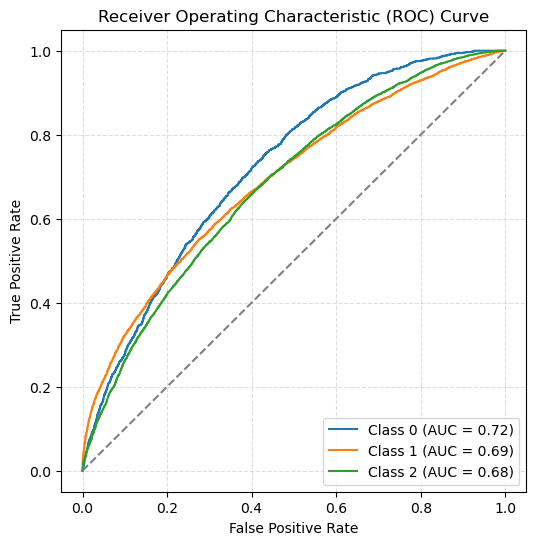

In [58]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [59]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[  697  2101  2977]
 [   27 32410  9236]
 [   20  7622 30410]]
    
    AUC: 0.8837571246817566

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.12      0.21      5775
           1       0.77      0.78      0.77     41673
           2       0.71      0.80      0.75     38052

    accuracy                           0.74     85500
   macro avg       0.81      0.57      0.58     85500
weighted avg       0.76      0.74      0.73     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 111  719 1027]
 [  23 9835 4051]
 [  13 3736 8985]]
    
    AUC: 0.786923774727764

    Classification Report:
                  precision    recall  f1-score   support

           0       0.76      0.06      0.11      1857
           1       0.69      0.71      0.70     13909
           2       0.64      0.71      0.67     12734

    accuracy                           0.66     28500
   macro avg 

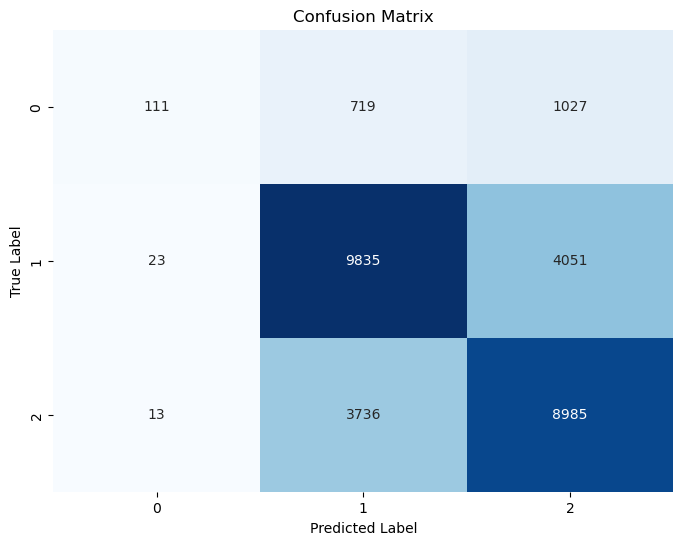

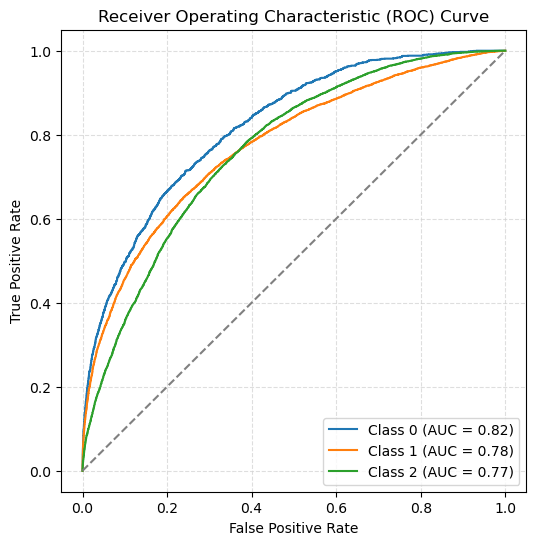

In [60]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  239  2258  3278]
 [    7 30190 11476]
 [    7 11229 26816]]
    
    AUC: 0.8164767468632356

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.04      0.08      5775
           1       0.69      0.72      0.71     41673
           2       0.65      0.70      0.67     38052

    accuracy                           0.67     85500
   macro avg       0.76      0.49      0.49     85500
weighted avg       0.69      0.67      0.65     85500

    
TEST METRICS
    Confusion Matrix: 
    [[  25  748 1084]
 [   9 9626 4274]
 [   3 4260 8471]]
    
    AUC: 0.7569556116650881

    Classification Report:
                  precision    recall  f1-score   support

           0       0.68      0.01      0.03      1857
           1       0.66      0.69      0.67     13909
           2       0.61      0.67      0.64     12734

    accuracy                           0.64     28500
   macro avg

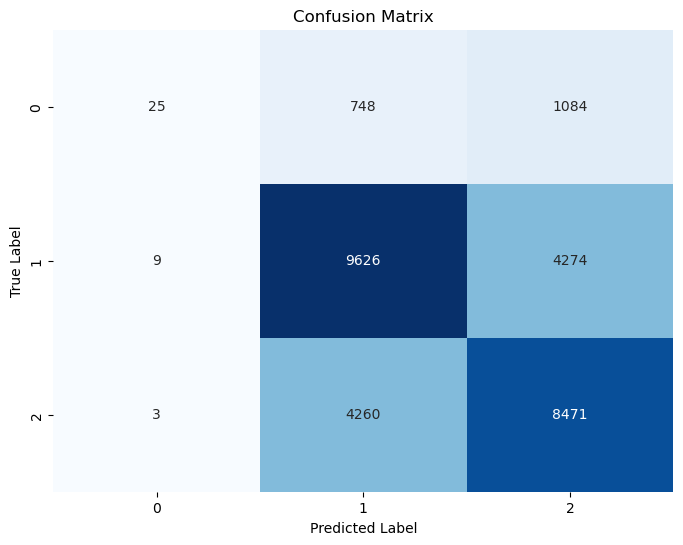

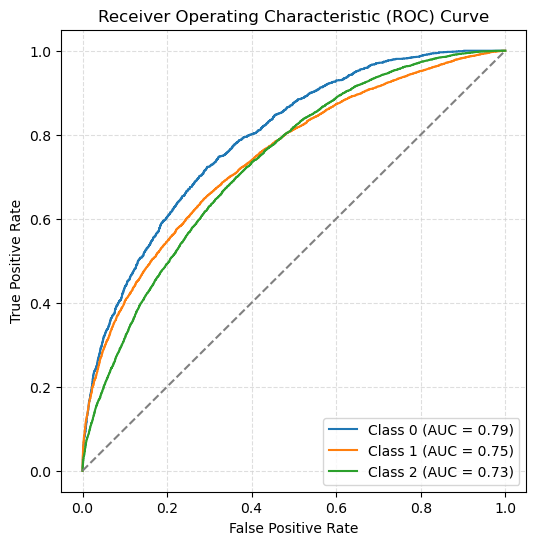

In [61]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [62]:
# Retrain the model on the ENTIRE dataset

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [63]:
 # Save off my models
import pickle

# Scaler
pickle.dump(ss, open("spotify_scaler.pkl", 'wb'))

# Model
pickle.dump(rf, open("spotify_model.pkl", 'wb'))